In [107]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas
import dill 
import pickle
import tensorly as tl
import matplotlib.pyplot as plt
import argparse
import torch
from tensorly.decomposition import parafac


import sys 
sys.path.append("../")
import factorization
from factorization import utils
from factorization import PARAFAC


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# data generation

In [37]:
input_tag="synthetic"
# input_type=
string_mode_dims="10,10,20"
entities="entity1/entity2/entity3"
entities = entities.split("/")
value_column = "value"
train_ratio=1

In [38]:
entities

['entity1', 'entity2', 'entity3']

In [39]:

raw_df = utils.generate_synthetic_data(string_mode_dims)
encoded_df = utils.prepare_tensor(raw_df, entities, value_column)
tensor_shape = (encoded_df[entities].max() + 1).values.astype(int)
nonzero_records = encoded_df.to_numpy()

nonzero_records_train, nonzero_records_test = utils.train_test_split(nonzero_records, train_ratio)
train_tensor = utils.nz_records_to_tensor(nonzero_records_train, tensor_shape)

      entity1  entity2  entity3     value
0           0        0        0 -1.968667
1           0        0        1 -2.515759
2           0        0        2  0.809838
3           0        0        3 -2.522177
4           0        0        4 -3.132215
...       ...      ...      ...       ...
1566        9        9       13 -2.314009
1567        9        9       15 -2.724369
1568        9        9       16 -3.672047
1569        9        9       18 -0.718136
1570        9        9       19 -2.991797

[1571 rows x 4 columns]
entity1
0       0
1       0
2       0
3       0
4       0
       ..
1566    9
1567    9
1568    9
1569    9
1570    9
Name: entity1, Length: 1571, dtype: int64
entity2
0       0
1       0
2       0
3       0
4       0
       ..
1566    9
1567    9
1568    9
1569    9
1570    9
Name: entity2, Length: 1571, dtype: int64
entity3
0        0
1        1
2        2
3        3
4        4
        ..
1566    13
1567    15
1568    16
1569    18
1570    19
Name: entity3, Length:

In [41]:
train_tensor
nonzero_records_train

array([[ 0.        ,  0.        ,  0.        , -1.96866714],
       [ 0.        ,  0.        ,  1.        , -2.51575871],
       [ 0.        ,  0.        ,  2.        ,  0.80983845],
       ...,
       [ 9.        ,  9.        , 16.        , -3.67204726],
       [ 9.        ,  9.        , 18.        , -0.71813559],
       [ 9.        ,  9.        , 19.        , -2.99179652]])

In [42]:
train_tensor

array([[[-1.96866714, -2.51575871,  0.80983845, ..., -0.34530746,
         -3.28053437, -3.74183054],
        [-7.86271616,  0.        , -0.76849581, ...,  0.        ,
         -0.79062393, -0.56777403],
        [-2.41017089, -2.5148343 , -1.88066015, ...,  0.        ,
         -4.6679043 ,  0.        ],
        ...,
        [-1.33722309, -4.71609588,  0.        , ..., -2.47228328,
         -1.82993962, -1.25210489],
        [-0.73848347, -2.9523138 , -0.03568801, ..., -2.13636899,
         -2.72742937, -0.22692173],
        [-6.34403094, -3.10954055, -1.46733828, ..., -1.57106334,
         -6.79812327,  0.81970636]],

       [[-3.52634559, -2.02041483, -2.93830718, ..., -0.08399878,
         -0.81438835, -2.25208478],
        [-1.11443519,  0.        , -0.98890955, ..., -1.42894109,
          0.        ,  1.31769261],
        [-3.7626334 ,  0.        , -1.29957892, ..., -0.17839283,
         -1.97102817, -0.41790523],
        ...,
        [-6.23145237, -2.88698225, -5.49162399, ..., -


## my parafac

In [187]:
rank=15
n_iter=15000
lr=0.1
my_parafac = PARAFAC(tensor_shape, rank)


Tensor shape:[10 10 20]
einsum:ka,kb,kc->abc


In [188]:
optimizer = torch.optim.Adagrad(my_parafac.parameters(), lr=lr)
factors = my_parafac.training_tensor(train_tensor, n_iter, optimizer)
re_tensor = my_parafac.forward().detach().numpy()
erorr = (train_tensor - re_tensor)**2

0: 10145.9609375
10: 5416.20947265625
20: 4960.75537109375
30: 4583.9306640625
40: 4280.05810546875
50: 4038.608154296875
60: 3854.95263671875
70: 3710.441162109375
80: 3602.892578125
90: 3518.7919921875
100: 3445.11376953125
110: 3379.89599609375
120: 3325.964111328125
130: 3283.65625
140: 3250.635009765625
150: 3224.2041015625
160: 3202.18017578125
170: 3183.425048828125
180: 3167.091796875
190: 3152.56201171875
200: 3139.65478515625
210: 3128.251953125
220: 3118.1611328125
230: 3109.109375
240: 3100.9033203125
250: 3093.47509765625
260: 3086.7177734375
270: 3080.49560546875
280: 3074.6474609375
290: 3069.055908203125
300: 3063.70068359375
310: 3058.573486328125
320: 3053.64306640625
330: 3048.8671875
340: 3044.19189453125
350: 3039.564453125
360: 3034.97412109375
370: 3030.437744140625
380: 3025.964599609375
390: 3021.551513671875
400: 3017.1875
410: 3012.850830078125
420: 3008.517578125
430: 3004.1875
440: 2999.88916015625
450: 2995.6533203125
460: 2991.50341796875
470: 2987.453613

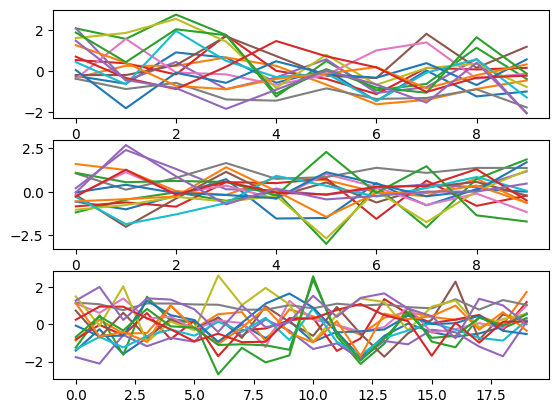

In [189]:
factors_numpy= [f.detach().numpy() for f in factors]
fig,axes = plt.subplots(3,1)

axes[0].plot(factors_numpy[0].T)
axes[1].plot(factors_numpy[1].T)
axes[2].plot(factors_numpy[2].T)

In [190]:
factors_numpy[0].shape

(15, 10)

In [191]:
np.sum(erorr)

2814.481811456698

## parafac tensorly

In [170]:
factors = parafac(train_tensor, rank=rank)

In [171]:
factors

(weights, factors) : rank-15 CPTensor of shape (10, 10, 20)

In [172]:
len(factors)

2

In [173]:
=[f.shape for f in factors[1]]

SyntaxError: invalid syntax (2126537306.py, line 1)

In [174]:
re_tensor2 = tl.cp_to_tensor(factors)

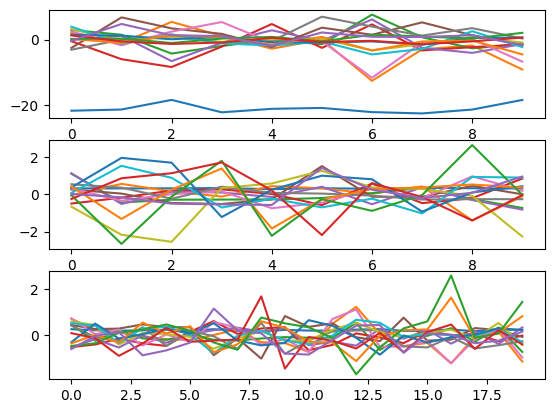

In [176]:
factors_numpy= [f for f in factors[1]]
fig,axes = plt.subplots(3,1)

axes[0].plot(factors_numpy[0])
axes[1].plot(factors_numpy[1])
axes[2].plot(factors_numpy[2])

In [153]:
re_tensor2

array([[[-2.10416497e+00, -1.98512309e+00,  4.79305047e-01, ...,
         -1.23183069e+00, -1.45821393e+00, -2.95181105e+00],
        [-4.94161712e+00, -1.05946081e+00, -2.73119076e+00, ...,
         -8.99208807e-01, -3.09672440e+00, -8.18515611e-01],
        [-3.84129007e+00, -2.49080490e+00, -7.00185152e-01, ...,
         -8.12527025e-01, -4.32697874e+00,  1.11384165e+00],
        ...,
        [-2.61341684e+00, -3.39217050e+00, -1.43108220e+00, ...,
         -2.66306659e+00, -2.70754888e+00, -3.76497233e+00],
        [-6.66520564e-01, -1.74530233e+00, -8.19794725e-01, ...,
         -5.83674047e-01, -1.93795078e+00, -2.66948070e-02],
        [-4.56062910e+00, -2.94988021e+00, -2.18567743e-01, ...,
         -1.17338200e+00, -5.15825645e+00,  7.34214623e-01]],

       [[-2.66693360e+00, -1.14322927e+00, -6.88747683e-01, ...,
         -1.37959756e+00, -1.00184271e+00, -3.40891707e+00],
        [-2.30908435e+00,  3.66950093e-01, -2.41179075e-01, ...,
         -1.80418207e-01,  1.10380318e

In [154]:
erorr = (train_tensor - re_tensor2)**2

In [155]:
np.sum(erorr)

2811.5809615063317